#### Bank Customer Classification
Artificial Neural Network
 
 For a given dataset predict whether customer will exit (Output variable “Exited”) the bank or not using artificial neural network


In [1]:
import os
import pandas as pd
import pandas.api.types as ptypes
import numpy as np
import seaborn as sb
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import pickle

In [2]:
# load dataset
df_original = pd.read_csv('Data/Churn_Modelling.csv')
df = df_original

In [3]:
# print top 5 row
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
# describe dataset
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [5]:
print ('The train data has {0} rows and {1} columns'.format(df.shape[0],df.shape[1]))

The train data has 10000 rows and 14 columns


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
# check for col
print("\n Column name",df.columns)


 Column name Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')


In [8]:
# check for datatype
print("\n",df.dtypes)


 RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object


In [9]:
# check for null value
print("\n\n",df.isnull().sum())



 RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


In [10]:
# calculating  sum of null values
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [11]:
# check fo duplicate data
print("\n check for duplicate \n",df.duplicated().sum())
           


 check for duplicate 
 0


In [12]:
# drop unwanted col
df.drop(columns=["RowNumber", "CustomerId","Surname"], inplace = True)
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
Age,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00
Tenure,10000.0,5.012800,2.892174,0.00,3.00,5.000,7.0000,10.00
Balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
NumOfProducts,10000.0,1.530200,0.581654,1.00,1.00,1.000,2.0000,4.00
HasCrCard,10000.0,0.705500,0.455840,0.00,0.00,1.000,1.0000,1.00
IsActiveMember,10000.0,0.515100,0.499797,0.00,0.00,1.000,1.0000,1.00
EstimatedSalary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48
Exited,10000.0,0.203700,0.402769,0.00,0.00,0.000,0.0000,1.00


In [14]:
# check for min values
df.min()

CreditScore           350
Geography          France
Gender             Female
Age                    18
Tenure                  0
Balance                 0
NumOfProducts           1
HasCrCard               0
IsActiveMember          0
EstimatedSalary     11.58
Exited                  0
dtype: object

In [15]:
# replace min values with mean
df.replace(0.0, df.mean(),inplace= True)

In [16]:
# check for min values 
df.min()

CreditScore            350
Geography           France
Gender              Female
Age                     18
Tenure                   1
Balance            3768.69
NumOfProducts            1
HasCrCard           0.7055
IsActiveMember      0.5151
EstimatedSalary      11.58
Exited              0.2037
dtype: object

In [17]:
# check for correlation
df.corr()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,-0.003965,0.002105,0.002614,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,-0.003965,1.000000,-0.008777,0.015149,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,0.002105,-0.008777,1.000000,-0.004243,0.002919,0.014676,-0.028065,0.011389,-0.009989
Balance,0.002614,0.015149,-0.004243,1.000000,-0.216214,-0.007936,-0.015026,0.008366,0.091143
NumOfProducts,0.012238,-0.030680,0.002919,-0.216214,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,-0.005458,-0.011721,0.014676,-0.007936,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.025651,0.085472,-0.028065,-0.015026,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.001384,-0.007201,0.011389,0.008366,0.014204,-0.009933,-0.011421,1.000000,0.012097
Exited,-0.027094,0.285323,-0.009989,0.091143,-0.047820,-0.007138,-0.156128,0.012097,1.000000


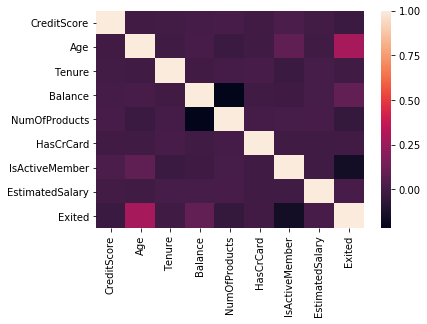

In [18]:
corr = df.corr()
sb.heatmap(corr)

In [19]:
df.shape

(10000, 11)

In [20]:
print (corr['Exited'].sort_values(ascending=False)[:15], '\n') #top 15 values
print ('----------------------')
print (corr['Exited'].sort_values(ascending=False)[-10:])

Exited             1.000000
Age                0.285323
Balance            0.091143
EstimatedSalary    0.012097
HasCrCard         -0.007138
Tenure            -0.009989
CreditScore       -0.027094
NumOfProducts     -0.047820
IsActiveMember    -0.156128
Name: Exited, dtype: float64 

----------------------
Exited             1.000000
Age                0.285323
Balance            0.091143
EstimatedSalary    0.012097
HasCrCard         -0.007138
Tenure            -0.009989
CreditScore       -0.027094
NumOfProducts     -0.047820
IsActiveMember    -0.156128
Name: Exited, dtype: float64


/home/admin1/anaconda3/envs/newenvt/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


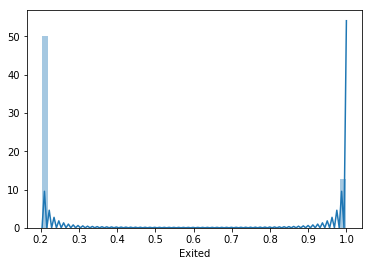

In [21]:
# displot label
sb.distplot(df['Exited'])


In [22]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2.0,76485.889288,1,1.0000,1.0000,101348.88,1.0000
1,608,Spain,Female,41,1.0,83807.860000,1,0.7055,1.0000,112542.58,0.2037
2,502,France,Female,42,8.0,159660.800000,3,1.0000,0.5151,113931.57,1.0000
3,699,France,Female,39,1.0,76485.889288,2,0.7055,0.5151,93826.63,0.2037
4,850,Spain,Female,43,2.0,125510.820000,1,1.0000,1.0000,79084.10,0.2037


In [23]:
x_data= df.iloc[:,0:10].values
y_data= df.iloc[:,10].values

In [24]:
x_data

array([[619, 'France', 'Female', ..., 1.0, 1.0, 101348.88],
       [608, 'Spain', 'Female', ..., 0.7055, 1.0, 112542.58],
       [502, 'France', 'Female', ..., 1.0, 0.5151, 113931.57],
       ...,
       [709, 'France', 'Female', ..., 0.7055, 1.0, 42085.58],
       [772, 'Germany', 'Male', ..., 1.0, 0.5151, 92888.52],
       [792, 'France', 'Female', ..., 1.0, 0.5151, 38190.78]],
      dtype=object)

In [25]:
x_data.shape, y_data.shape

((10000, 10), (10000,))

In [26]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

labelencoder_X_1 = LabelEncoder() 
x_data[:,1] = labelencoder_X_1.fit_transform(x_data[:,1])

labelencoder_X_2 = LabelEncoder() 
x_data[:, 2] = labelencoder_X_2.fit_transform(x_data[:, 2])
"""
It label France=0,  Spain=2,  Germany= 1 using LabelEncoder
"""
print(x_data.shape)
x_data

(10000, 10)


array([[619, 0, 0, ..., 1.0, 1.0, 101348.88],
       [608, 2, 0, ..., 0.7055, 1.0, 112542.58],
       [502, 0, 0, ..., 1.0, 0.5151, 113931.57],
       ...,
       [709, 0, 0, ..., 0.7055, 1.0, 42085.58],
       [772, 1, 1, ..., 1.0, 0.5151, 92888.52],
       [792, 0, 0, ..., 1.0, 0.5151, 38190.78]], dtype=object)

In [27]:
onehotencoder = OneHotEncoder(categorical_features = [1])
x_data = onehotencoder.fit_transform(x_data).toarray()
x_data = x_data[:, 1:]
print(x_data.shape)
x_data

(10000, 11)


array([[0.0000000e+00, 0.0000000e+00, 6.1900000e+02, ..., 1.0000000e+00,
        1.0000000e+00, 1.0134888e+05],
       [0.0000000e+00, 1.0000000e+00, 6.0800000e+02, ..., 7.0550000e-01,
        1.0000000e+00, 1.1254258e+05],
       [0.0000000e+00, 0.0000000e+00, 5.0200000e+02, ..., 1.0000000e+00,
        5.1510000e-01, 1.1393157e+05],
       ...,
       [0.0000000e+00, 0.0000000e+00, 7.0900000e+02, ..., 7.0550000e-01,
        1.0000000e+00, 4.2085580e+04],
       [1.0000000e+00, 0.0000000e+00, 7.7200000e+02, ..., 1.0000000e+00,
        5.1510000e-01, 9.2888520e+04],
       [0.0000000e+00, 0.0000000e+00, 7.9200000e+02, ..., 1.0000000e+00,
        5.1510000e-01, 3.8190780e+04]])

In [39]:
from sklearn.model_selection import train_test_split
# os.mkdir("Pickle")
        # split train and test data
x_train, x_test,y_train,y_test = train_test_split(x_data,y_data,test_size = 20, random_state=0)


# saving datasets into pickel files
file = open('Tensorflow_testdata_Pickle/testing.pickle', 'wb')

# dump information to that file
pickle.dump(x_test, file)
pickle.dump(y_test,file)

# close the file
file.close()


# divide train data into train and cross validation 
x_train, x_cv,y_train,y_cv = train_test_split(x_train,y_train,test_size = 20 ,random_state=0)


In [40]:
# # dump train model pickle file
file = open('Tensorflow_testdata_Pickle/testing.pickle', 'rb')
x_test = pickle.load(file)
y_test = pickle.load(file)


In [31]:
x_train.shape, y_train.shape

((9960, 11), (9960,))

In [32]:
sc = StandardScaler() 
x_train = sc.fit_transform(x_train) 
x_cv = sc.transform(x_cv) 

In [33]:
x_cv.shape, y_cv.shape

((20, 11), (20,))

In [34]:
x_test.shape, y_test.shape

((20, 11), (20,))

In [37]:
import tensorflow as tf

y_train = y_train.reshape(9960, 1)
y_test= y_test.reshape(-1,1)

n_nodes_hl1 = 500
n_nodes_hl2 = 500
n_nodes_hl3 = 500

n_classes = 2
batch_size = 100

x = tf.placeholder('float', [None, 11])
y = tf.placeholder('float')

def neural_network_model(data):
    hidden_1_layer = {'weights':tf.Variable(tf.random_normal([11, n_nodes_hl1])),
                      'biases':tf.Variable(tf.random_normal([n_nodes_hl1]))}

    hidden_2_layer = {'weights':tf.Variable(tf.random_normal([n_nodes_hl1, n_nodes_hl2])),
                      'biases':tf.Variable(tf.random_normal([n_nodes_hl2]))}

    hidden_3_layer = {'weights':tf.Variable(tf.random_normal([n_nodes_hl2, n_nodes_hl3])),
                      'biases':tf.Variable(tf.random_normal([n_nodes_hl3]))}

    output_layer = {'weights':tf.Variable(tf.random_normal([n_nodes_hl3, n_classes])),
                    'biases':tf.Variable(tf.random_normal([n_classes])),}


    l1 = tf.add(tf.matmul(data,hidden_1_layer['weights']), hidden_1_layer['biases'])
    l1 = tf.nn.relu(l1)

    l2 = tf.add(tf.matmul(l1,hidden_2_layer['weights']), hidden_2_layer['biases'])
    l2 = tf.nn.relu(l2)

    l3 = tf.add(tf.matmul(l2,hidden_3_layer['weights']), hidden_3_layer['biases'])
    l3 = tf.nn.relu(l3)

    output = tf.matmul(l3,output_layer['weights']) + output_layer['biases']

    return output

def train_neural_network(x):
    prediction = neural_network_model(x)
    # OLD VERSION:
    #cost = tf.reduce_mean( tf.nn.softmax_cross_entropy_with_logits(prediction,y) )
    # NEW:
    cost = tf.reduce_mean( tf.nn.softmax_cross_entropy_with_logits(logits=prediction, labels=y) )
    optimizer = tf.train.AdamOptimizer(learning_rate=0.0002).minimize(cost)
    
    hm_epochs = 10
    with tf.Session() as sess:
        # OLD:
        #sess.run(tf.initialize_all_variables())
        # NEW:
        sess.run(tf.global_variables_initializer())

        for epoch in range(hm_epochs):
            epoch_loss = 0
            for _ in range(10):
                _, c = sess.run([optimizer, cost], feed_dict={x: x_train, y: y_train})
                epoch_loss += c
                epoch_loss += c

            print('Epoch', epoch, 'completed out of',hm_epochs,'loss:',epoch_loss)

        correct = tf.equal(tf.argmax(prediction, 1), tf.argmax(y, 1))

        accuracy = tf.reduce_mean(tf.cast(correct, 'float'))*100
        print('Accuracy:',accuracy.eval({x:x_train, y:y_train}))
        print('Accuracy:',accuracy.eval({x:x_test, y:y_test}))
        
train_neural_network(x)

Epoch 0 completed out of 10 loss: 201931.2060546875
Epoch 1 completed out of 10 loss: 118645.69921875
Epoch 2 completed out of 10 loss: 67197.88330078125
Epoch 3 completed out of 10 loss: 54756.60986328125
Epoch 4 completed out of 10 loss: 49160.037109375
Epoch 5 completed out of 10 loss: 43821.42236328125
Epoch 6 completed out of 10 loss: 40644.56103515625
Epoch 7 completed out of 10 loss: 37953.88037109375
Epoch 8 completed out of 10 loss: 36039.309814453125
Epoch 9 completed out of 10 loss: 34497.173828125
Accuracy: 45.933735
Accuracy: 85.0


In [38]:
import tensorflow as tf

y_train = y_train.reshape(9960,1)
y_test= y_test.reshape(-1,1)
y_cv = y_cv.reshape(-1,1)

n_nodes_hl1 = 500
n_nodes_hl2 = 500
n_nodes_hl3 = 500

n_classes = 2
batch_size = 5500
# model_path = "/tmp/model.ckpt"

x = tf.placeholder('float', [None, 11])
y = tf.placeholder('float')


print(y.shape, type(y))
def neural_network_model(data):
    hidden_1_layer = {'weights':tf.Variable(tf.random_normal([11, n_nodes_hl1])),
                     'biases':tf.Variable(tf.random_normal([n_nodes_hl1]))}

    hidden_2_layer = {'weights':tf.Variable(tf.random_normal([n_nodes_hl1, n_nodes_hl2])),
                     'biases':tf.Variable(tf.random_normal([n_nodes_hl2]))}

    hidden_3_layer = {'weights':tf.Variable(tf.random_normal([n_nodes_hl2, n_nodes_hl3])),
                     'biases':tf.Variable(tf.random_normal([n_nodes_hl3]))}

    output_layer = {'weights':tf.Variable(tf.random_normal([n_nodes_hl3, n_classes])),
                   'biases':tf.Variable(tf.random_normal([n_classes])),}


    l1 = tf.add(tf.matmul(data,hidden_1_layer['weights']), hidden_1_layer['biases'])
    l1 = tf.nn.relu(l1)

    l2 = tf.add(tf.matmul(l1,hidden_2_layer['weights']), hidden_2_layer['biases'])
    l2 = tf.nn.relu(l2)

    l3 = tf.add(tf.matmul(l2,hidden_3_layer['weights']), hidden_3_layer['biases'])
    l3 = tf.nn.relu(l3)

    output = tf.matmul(l3,output_layer['weights']) + output_layer['biases']

    return output

def train_neural_network(x):
    prediction = neural_network_model(x)
    cost = tf.reduce_mean( tf.nn.softmax_cross_entropy_with_logits(logits=prediction,labels = y) )
    optimizer = tf.train.AdamOptimizer(learning_rate=0.001).minimize(cost)
   
    hm_epochs = 10
   
    # 'Saver' op to save and restore all the variables
    saver = tf.train.Saver()
    
    with tf.Session() as sess:
        sess.run(tf.initialize_all_variables())
        for epoch in range(hm_epochs):
            epoch_loss = 0
            for _ in range(10):
                _, c = sess.run([optimizer, cost], feed_dict={x: x_train, y: y_train})
                epoch_loss += c
                # Create a checkpoint in every iteration
                #saver.save(sess, 'model_iter', global_step=_)

            print('Epoch', epoch, 'completed out of',hm_epochs,'loss:',epoch_loss)
                       

        # Save the final model
        saver.save(sess, 'Tensorflow_testdata_Pickle/model_final')
        
        correct = tf.equal(tf.argmax(prediction, 1), tf.argmax(y, 1))

        accuracy = tf.reduce_mean(tf.cast(correct, 'float'))*100
        print('Accuracy:',accuracy.eval({x:x_cv, y:y_cv}))
        
        
    print("\n\n Second session Start Testing dataset\n\n")
    with tf.Session() as sess:

    
        sess.run(tf.initialize_all_variables())
        # Restore model weights from previously saved model
        saver.restore(sess,'model_save/model_final')

        for epoch in range(hm_epochs):
            epoch_loss = 0
            for _ in range(10):
                _, c = sess.run([optimizer, cost], feed_dict={x: x_train, y: y_train})
                epoch_loss += c


            print('Epoch', epoch, 'completed out of',hm_epochs,'loss:',epoch_loss)

        correct = tf.equal(tf.argmax(prediction, 1), tf.argmax(y, 1))

        
        accuracy = tf.reduce_mean(tf.cast(correct, 'float'))*100
        print('Accuracy:',accuracy.eval({x:x_test, y:y_test}))

        
        

train_neural_network(x)



<unknown> <class 'tensorflow.python.framework.ops.Tensor'>
Epoch 0 completed out of 10 loss: 46726.555419921875
Epoch 1 completed out of 10 loss: 25315.3662109375
Epoch 2 completed out of 10 loss: 18996.560668945312
Epoch 3 completed out of 10 loss: 15868.050659179688
Epoch 4 completed out of 10 loss: 13648.342163085938
Epoch 5 completed out of 10 loss: 12373.799438476562
Epoch 6 completed out of 10 loss: 11490.028930664062
Epoch 7 completed out of 10 loss: 10963.456909179688
Epoch 8 completed out of 10 loss: 10737.98486328125
Epoch 9 completed out of 10 loss: 10765.475708007812
Accuracy: 65.0


 Second session Start Testing dataset


INFO:tensorflow:Restoring parameters from model_save/model_final
Epoch 0 completed out of 10 loss: 10855.990600585938
Epoch 1 completed out of 10 loss: 10959.284912109375
Epoch 2 completed out of 10 loss: 11065.580688476562
Epoch 3 completed out of 10 loss: 11200.754760742188
Epoch 4 completed out of 10 loss: 11559.223876953125
Epoch 5 completed out of 10